In [4]:
### Homework 2 EconS 525 by Emma Taylor

### Part 1 : 
## a

import wooldridge as woo
import numpy as np

ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

# ingredients to the OLS formulas:
    
cov_xy = np.cov(x,y)[1,0] # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)


# manual calculation of OLS 

b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

print(f'b1 : {b1}\n')
print(f'b0 : {b0}\n')

b1 : 18.50118634521493

b0 : 963.1913364725577



In [5]:
## b 
import wooldridge as woo 
import statsmodels.formula.api as smf

ceosal1 = woo.dataWoo('ceosal1')

reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')


b: 
Intercept    963.191336
roe           18.501186
dtype: float64



FileNotFoundError: [Errno 2] No such file or directory: 'PyGraphs/Example-2-3-3.pdf'

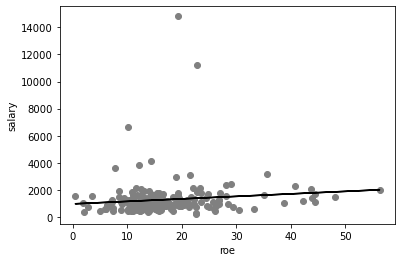

In [21]:
## c

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')

# OLS regression:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()

# scatter plot and fitted values: 
plt.plot('roe','salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')
plt.savefig('PyGraphs/Example-2-3-3.pdf')


In [6]:
## d 

import pandas as pd

ceosal1 = woo.dataWoo('ceosal1')

# OLS regression:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()

# obtain predicted values and residuals:
salary_hat = results.fittedvalues
u_hat = results.resid

# Wooldridge, Table 2.2:
table = pd.DataFrame({'roe': ceosal1['roe'],
                      'salary': ceosal1['salary'],
                      'salary_hat': salary_hat,
                      'u_hat': u_hat})
print(f'table.head(15): \n{table.head(15)}\n')



table.head(15): 
          roe  salary   salary_hat       u_hat
0   14.100000    1095  1224.058071 -129.058071
1   10.900000    1001  1164.854261 -163.854261
2   23.500000    1122  1397.969216 -275.969216
3    5.900000     578  1072.348338 -494.348338
4   13.800000    1368  1218.507712  149.492288
5   20.000000    1145  1333.215063 -188.215063
6   16.400000    1078  1266.610785 -188.610785
7   16.299999    1094  1264.760660 -170.760660
8   10.500000    1237  1157.453793   79.546207
9   26.299999     833  1449.772523 -616.772523
10  25.900000     567  1442.372056 -875.372056
11  26.799999     933  1459.023116 -526.023116
12  14.800000    1339  1237.008898  101.991102
13  22.299999     937  1375.767778 -438.767778
14  56.299999    2011  2004.808114    6.191886



In [4]:
## e

import pandas as pd

vote1 = woo.dataWoo('vote1')

#OLS regression:
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           6.63e-74
Time:                        15:45:03   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887

In [7]:
## f 

import numpy as np

meap93 = woo.dataWoo('meap93')

# estimate the model and save the results as "results":
reg = smf.ols(formula='math10 ~ lnchprg', data=meap93)
results = reg.fit()

# number of obs.:
n = results.nobs

# SER: 
u_hat_var = np.var(results.resid, ddof=1)
SER = np.sqrt(u_hat_var) * np.sqrt((n - 1) / (n - 2))
print(f'=SER: {SER}\n')

# SE of b0 & b1, respectively:
lnchprg_sq_mean = np.mean(meap93['lnchprg'] ** 2)
lnchprg_var = np.var(meap93['lnchprg'], ddof=1)
b1_se = SER / (np.sqrt(lnchprg_var)
               * np.sqrt(n-1)) * np.sqrt(lnchprg_sq_mean)
b0_se = SER / (np.sqrt(lnchprg_var) * np.sqrt(n-1))


=SER: 9.565938459482764



In [10]:
## g 3.7
import patsy as pt

gpa1 = woo.dataWoo('gpa1')

# determine sample size & no. of regressors:
n = len(gpa1)
k = 2

# extract y:
y = gpa1['colGPA']

# extract X & add a column of ones:
X = pd.DataFrame({'const' : 1, 'hsGPA': gpa1['hsGPA'], 'ACT': gpa1['ACT']})

# alternative with patsy: 
y2, X2 = pt.dmatrices('colGPA ~ hsGPA + ACT', data=gpa1, return_type='dataframe')

# display first rows of X: 
print(f'X.head(): \n{X.head()}\n')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# residuals, estimated vairance of u and SER: 
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n') 


X.head(): 
   const  hsGPA  ACT
0      1    3.0   21
1      1    3.2   24
2      1    3.6   26
3      1    3.5   27
4      1    3.9   28

b: 
[[1.28632777]
 [0.45345589]
 [0.00942601]]

SER: [[0.34031576]]

se: [0.34082212 0.09581292 0.01077719]

ERROR! Session/line number was not unique in database. History logging moved to new session 26


In [8]:
## Part 2: 
    
## Problem 3
# numpy version

import numpy as np

student = np.array([1, 2, 3, 4, 5, 6, 7, 8])
gpa = np.array([2.8, 3.4, 3.0, 3.5, 3.6, 3.0, 2.7, 3.7])
act = np.array([21, 24, 26, 27, 29, 25, 25, 30])

df = pd.DataFrame({'student' : student,
                   'gpa' : gpa,
                   'act' : act})

y = df['gpa']

X = pd.DataFrame({'const' : 1, 'act': df['act']})

X = np.array(X)
y = np.array(y).reshape(8, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')


reg = smf.ols(formula='gpa ~ act', data=df)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

### i: B0 is equal to 0.568, which can be interpreted as the GPA earned prediction for students who got a 0 on the ACT.
### This is unlikely, but could still be useful as a 'base' GPA.
### If an ACT score rises by 5 points, GPA should rise by .511 points (ceteris paribus), which is logical. 

### ii: 

### SER: 0.05612649
### The residuals sum to 0.056, which is very close to 0.

### iii: Predicted GPA
### 2.6121

### iv:  R^2
### The R^2 of this model (the percentage of variation in GPA explained by ACT scores) is equal to 0.577, or 57.7%.



b: 
[[0.56813187]
 [0.1021978 ]]

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     8.199
Date:                Wed, 02 Feb 2022   Prob (F-statistic):             0.0287
Time:                        16:37:25   Log-Likelihood:                0.29842
No. Observations:                   8   AIC:                             3.403
Df Residuals:                       6   BIC:                             3.562
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\emmat\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
### C1
import matplotlib.pyplot as plt
import pandas as pd

TaxData = woo.dataWoo('401k')
    
#  prate                       participation rate, percent
#  mrate                       401k plan match rate

# find the summary statistics for all data 
Data_summary = TaxData.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = TaxData.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(TaxData)
k = 1

# scater plot prate vs mrate
plt.plot(TaxData['prate'], TaxData['mrate'], 'o', color='black')
plt.ylabel('Participaation Rate %')
plt.xlabel('401k Match rate')
plt.savefig('Graph-401k.pdf')
plt.close()

# extract y:
y = TaxData['prate']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'mrate': TaxData['mrate']})

# alternative with patsy:
y2, X2 = pt.dmatrices('prate ~ mrate', data=TaxData, return_type='dataframe')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

reg = smf.ols(formula='prate ~ mrate', data=TaxData)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

## (i) the average participation rate is 87.36 and the average match rate is 0.73
## (ii) b0 is 83.08, b1 is 5.86, and r-squared is 0.075
## (iii) b0 means that if one has a 401k plan match rate of 0, they will still have a participation rate of at least 83.08
##       b1, the coefficient on mrate, implies an increase in mrate by 1 unit will increase prate by 5.86
## (iv) the predicted prate when mrate is 3.5 is 103.59; this is not a reasonable preidction because hypothetically participation rate could not exceed 100%
## (v) 7.5% of the variance in prate is explained by mrate, which is quite low 

Data_summary:
             prate        mrate       totpart        totelg          age  \
count  1534.000000  1534.000000   1534.000000   1534.000000  1534.000000   
mean     87.362907     0.731512   1354.230769   1628.534550    13.181226   
std      16.716537     0.779539   4629.264665   5370.719356     9.171114   
min       3.000000     0.010000     50.000000     51.000000     4.000000   
25%      78.025000     0.300000    156.250000    176.000000     7.000000   
50%      95.699997     0.460000    276.000000    330.000000     9.000000   
75%     100.000000     0.830000    749.500000    890.500000    18.000000   
max     100.000000     4.910000  58811.000000  70429.000000    51.000000   

              totemp         sole      ltotemp  
count    1534.000000  1534.000000  1534.000000  
mean     3568.495437     0.487614     6.686034  
std     11217.939519     0.500010     1.453375  
min        58.000000     0.000000     4.060443  
25%       261.000000     0.000000     5.564520  
50%    

In [11]:
### C3

sleep75 = woo.dataWoo('sleep75')

y = sleep75['sleep']

X = pd.DataFrame({'const' : 1, 'totwrk': sleep75['totwrk']})

X = np.array(X)
y = np.array(y).reshape(706, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')


reg = smf.ols(formula='sleep ~ totwrk', data=sleep75)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

## i. sleep = 3586.3770 - 0.1507*totwrk 
## n = 706 ; R^2 = 0.013
## This intercept implies that people who work 0 hours a week (the dream!) sleep for 3586 minutes per week.

## ii. If total work increases by 2 hours (120 minutes), sleep will fall by 18.084 minutes.
## This is not a very significant effect.


b: 
[[ 3.58637695e+03]
 [-1.50745824e-01]]

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.99e-18
Time:                        16:56:33   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [12]:
### C6
testdata = woo.dataWoo('MEAP93')
  
# expend                   expend. per stud., $
# math10                   perc studs passing MEAP math

# find the summary statistics for all data 
Data_summary = testdata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = testdata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(testdata)
k = 1

# scater plot math10 vs expend
plt.plot(testdata['expend'], testdata['math10'], 'o', color='black')
plt.ylabel('math passing rate %')
plt.xlabel('expenditure /student $')
plt.savefig('graph-testdata.pdf')
plt.close()

# extract y:
y = testdata['math10']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'expend': testdata['expend']})

# alternative with patsy:
y2, X2 = pt.dmatrices('math10 ~ expend', data=testdata, return_type='dataframe')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='math10 ~ expend', data=testdata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# estimate log-level model for math10 and logexpend
reg = smf.ols(formula='math10 ~ np.log(expend)', data=testdata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) diminishing effect seems more approriate because only 100% of students can pass, so eventually the slope would get less steep as it approaches a 100% passing rate given the law of diminishing marginal returns
## (ii) ∆math10/∆expend = b1/expend so ∆expend/expend 0.1 and then math10 = (∆expend/expend)*b1 = 0.1*b1; therefore, b1/10 is the percentage point change in math10 given a 10% increase in expend
## (iii) estimated equation is math10 = -69.34 + 11.16*log(expend) + u, the sample size is 408, and r-squared is 0.30
## (iv) is spending increases by 10%, then the estimated percentage point increase in math10 is 11.16
## (v) -69.34 + 11.16log(expend) > 100
##     log(expend) > 15.17 
##     therefore, the equation must meet the condiction of expend > 3,874,782.15 for math10 to be above 100, which is unlikely 


Data_summary:
          lnchprg        enroll       staff       expend        salary  \
count  408.000000    408.000000  408.000000   408.000000    408.000000   
mean    25.201471   2663.806373  100.641667  4376.578431  31774.507353   
std     13.610075   2696.820560   13.299518   775.789717   5038.303826   
min      1.400000    212.000000   65.900002  3332.000000  19764.000000   
25%     14.625000   1037.500000   91.450001  3821.250000  28185.500000   
50%     23.849999   1840.500000   99.000000  4145.000000  31266.000000   
75%     33.825000   3084.750000  108.025000  4658.750000  34499.750000   
max     79.500000  16793.000000  166.600006  7419.000000  52812.000000   

           benefits    droprate    gradrate      math10       sci11  \
count    408.000000  408.000000  408.000000  408.000000  408.000000   
mean    6463.428922    5.066422   83.651716   24.106863   49.183088   
std     1456.337659    5.485072   13.368375   10.493613   12.524668   
min        0.000000    0.000000   2

In [13]:
### C8 

import scipy.stats as stats

np.random.seed(1234567)

n = 500

beta0 = 1
beta1 = 2
su = 6

x = stats.uniform.rvs(0,10, size=n)
u = stats.norm.rvs(0,su, size=n)
y = beta0 + beta1 * x + u

x_mean = np.mean(x)
print(x_mean)

x_std = np.std(x)
print(x_std)

u_mean = np.mean(u)
print(u_mean)

u_std = np.std(u)
print(u_std)

df=pd.DataFrame({'y' : y, 'x' : x})

reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params

print(f'b: \n{b}\n')


## i. sample mean = 5.0346
##    sample standard deviation = 2.9465


## ii. Sample mean of u is 0.05, which is slightly above 0. This is expected.
## We expect this because the sample is not perfectly normally distributed.
## Even though most of the values are centered around 0, it is not exact.
## Sample standard deviation of u is 5.734.

## iii. The intercept was estimated as 1.23, slightly above 1. The beta1 was estimated
## as 1.96, which is slightly below the true value of 2. These sample esimates are different
## from the population true values because the sample is only a small subset of the total population,
## and samples cannot be predetermined to be perfectly representative.

u_hat = results.resid
u_hat_mean = np.mean(u_hat)
print(u_hat_mean)

## iv. The expected value of the residuals is effectively zero, meaning the first assumption of OLS holds.
## v. The expected value of the sampled u was slightly larger, at 0.05, but it is still very close to 0.


np.random.seed(123)

n = 500

beta0 = 1
beta1 = 2
su = 6

x = stats.uniform.rvs(0,10, size=n)
u = stats.norm.rvs(0,su, size=n)
y = beta0 + beta1 * x + u

x_mean = np.mean(x)
print(x_mean)

x_std = np.std(x)
print(x_std)

u_mean = np.mean(u)
print(u_mean)

u_std = np.std(u)
print(u_std)

df=pd.DataFrame({'y' : y, 'x' : x})

reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params

print(f'b: \n{b}\n')

## vi. The new intercept is 0.65, and the new beta1 is 2.06. They are different again because individual samples differ from populations slightly.



5.034667077395576
2.946564680914688
0.05197869216016642
5.734179046193291
b: 
Intercept    1.239251
x            1.962803
dtype: float64

4.3876013933186186e-16
4.944373822186117
2.860096321967652
-0.011704334254122529
6.078033519213477
b: 
Intercept    0.653182
x            2.067777
dtype: float64



In [14]:
### C11
gpadata = woo.dataWoo('GPA1')

 # colGPA                  MSU GPA
 # PC                      =1 of pers computer at sch

# find the summary statistics for all data 
Data_summary = gpadata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = gpadata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(gpadata)
k = 1

# scater plot colGPA vs PC
plt.plot(gpadata['colGPA'], gpadata['PC'], 'o', color='black')
plt.ylabel('college gpa')
plt.xlabel('owns a pc')
plt.savefig('graph-colgpa.pdf')
plt.close()

# extract y:
y = gpadata['colGPA']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'PC': gpadata['PC']})

# alternative with patsy:
y2, X2 = pt.dmatrices('colGPA ~ PC', data=gpadata, return_type='dataframe')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

reg = smf.ols(formula='colGPA ~ PC', data=gpadata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

## (i) there are 141 students in the sample; the average college gpa is 3.06 while the high is 4.00
## (ii) 39.72% of students own their own PC
## (iii) b0 is 2.99 and b1 is 0.17; b0 is relatively high meaning the base gpa someone can have without owning a pc is 2.99 and b1 is low, so owning pc does not increase one's gpa substantially 
## (iv) r-squared is 0.05, which means 5%, very little, of the variation is college gpa is explained by owning a pv
## (v) this does not imply owning a pc has a causal effect on college gpa becuase the two variables only have a minor correlation according to the estimated equation 


Data_summary:
              age        soph      junior      senior     senior5        male  \
count  141.000000  141.000000  141.000000  141.000000  141.000000  141.000000   
mean    20.886525    0.021277    0.382979    0.503546    0.092199    0.524823   
std      1.271064    0.144819    0.487846    0.501770    0.290337    0.501164   
min     19.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     20.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     21.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
75%     21.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max     30.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           campus    business    engineer      colGPA  ...       greek  \
count  141.000000  141.000000  141.000000  141.000000  ...  141.000000   
mean     0.170213    0.794326    0.035461    3.056738  ...    0.319149   
std      0.377159    0.405634    0

In [ ]:
### Chapter 3 Question 3

### i. The sign of B1 will be negative if there is a trade off between sleep and work.
### ii. I imagine that people with more education will sleep less, due to possibly longer work hours.
### I think that the sign of B3 might be positive, as older people might have more stable schedules.
### iii. If someone works 5 more hours a week, their total sleep for the week will fall by 44.4 minutes.
### This is not a large change when considered over a whole week of sleep.
### iv. The coefficient on B3 implies that for each further year of education attained,
###  a person will sleep 11.13 fewer minutes per week. This is the largest coefficient, but because education
###  has a capped value, it probably is not making a huge difference on total sleep amounts.
### v. No! The R^2 is only .113, which is quite low. People might have different preferences for length of sleep,
### or they could have children, which greatly lowers one's time sleeping. I do not think that these would be correlated
### with time working.

### 4
lawdata = woo.dataWoo('LAWSCH85')

## (i) we expect b5 to be ≤ 0 because a higher ranking implies a number closer to 1 not 100, and one would expect a higher salary having gone to a better law school
## (ii) we expect a positive slope for b1, b2, b3, and b4 a higher lsat score, gpa, number of volumes in the law school library, cost of annual attendance implies the individual is attending a better law school and therefore should have a higher starting salary post graduating
## (iii) ceretis paribus, a median GPA difference by one point increases one's starting salary by 24.8%
## (iv) a 1% increase in the number of volumes in the law school library increases one's starting salary by 3.8%
## (v) i would say it is better to attend a higher ranked law school because a difference in ranking of 20 points is worth a 7% increase in one's starting salary


### 6  
### i.
### By the first assumption of OLS (E(u)=0) and by properties of the expected value operator,
### E(Theta) = E(beta0hat + beta1hat)
### E(Theta) = E(beta0hat) + E(beta1hat)
### Given that each individual expected value is equivalent to its true value, 
### Theta = B0hat + B1hat is an unbiased estimator of Theta.

### ii.
### Theta = Beta0hat + Beta1hat
### By variance properties, Var(Theta) = Var(B0hat + B1hat)
### Further, Var(Theta) = Var(B0hat) + Var(B1hat) + 2Cov(B0hat,B1hat)
### Var(Theta) = Var(B0hat) + Var(B1hat) + 2Corr(B0hat, B1hat) * sigmaB1 * sigmaB2
### Chapter 3 Question 6
### 

### 7
### Heteroskedasticity, endogeneity, and multicollinearity can all cause an OLS estimator to be biased.

### 10
### i. I would expect B~ and B^ to be relatively similar. As x1 is highly correlated with x2 and x3, their effects on B are likely to be similar.
### This implies that the estimated models would be similar as well.
### ii. I would expect B~ and B^ to be different in this case, as x2 and x3 are adding new information to the model.
### iii. Standard errors would likely increase with the addition of variables, escpecially ones with low explanatory power.
### iv. The effect of standard errors would be ambivalent, as additional variables would increase standard errors usually,
### but if x2 and x3 have high explanatory power, it could lower the SEs. 


In [15]:
### Chapter 3 C2
housedata = woo.dataWoo('hprice1')

# price                    house price, $1000s
# bdrms                    number of bdrms
# sqrft                    size of house in square feet

# find the summary statistics for all data 
Data_summary = housedata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = housedata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(housedata)
k = 1

# extract y:
y = housedata['price']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'sqrft': housedata['sqrft'], 'bdrms': housedata['bdrms']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='price ~ sqrft + bdrms', data=housedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) price = -19.31 + 0.13*sqrft + 15.20*bdrms
## (ii) holding square feet constant, one more bedroom increases the price of a house by $15,200
## (iii) a house with an additional bedroom that is 140 square feet in size increases the price of a house by $33,400
## (iv) 63.2% of the variation is price is explained by square footage and number of bedrooms
## (v) the predicted selling price of a house with 2,438 square feet and 4 bedrooms is $362,330
## (vi) the predicted selling price for the first house in the data is $358,430 so the buyer underpaid


Data_summary:
            price      assess      bdrms       lotsize        sqrft  \
count   88.000000   88.000000  88.000000     88.000000    88.000000   
mean   293.546034  315.736362   3.568182   9019.863636  2013.693182   
std    102.713445   95.314435   0.841393  10174.150414   577.191583   
min    111.000000  198.699997   2.000000   1000.000000  1171.000000   
25%    230.000000  253.900002   3.000000   5732.750000  1660.500000   
50%    265.500000  290.199997   3.000000   6430.000000  1845.000000   
75%    326.250000  352.125000   4.000000   8583.250000  2227.000000   
max    725.000000  708.599976   7.000000  92681.000000  3880.000000   

        colonial     lprice    lassess   llotsize     lsqrft  
count  88.000000  88.000000  88.000000  88.000000  88.000000  
mean    0.693182   5.633180   5.717994   8.905104   7.572610  
std     0.463816   0.303573   0.262113   0.544060   0.258688  
min     0.000000   4.709530   5.291796   6.907755   7.065613  
25%     0.000000   5.438079   5

In [24]:
### Chapter 3 C3

ceosal2 = woo.dataWoo('ceosal2')
pd.set_option('display.max_columns', None) 

y = ceosal2['lsalary']

X = pd.DataFrame({'const' : 1, 'lsales': ceosal2['lsales'], 'lmktval': ceosal2['lmktval']})

X = np.array(X)
y = np.array(y).reshape(177, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')


reg = smf.ols(formula='lsalary ~ lsales + lmktval', data=ceosal2)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

### i. lsalary = 4.6209 + 0.1621*lsales + 0.1067*lmktval + e 

y = ceosal2['lsalary']

X = pd.DataFrame({'const' : 1, 'lsales': ceosal2['lsales'], 'lmktval': ceosal2['lmktval'], 'profits': ceosal2['profits']})

X = np.array(X)
y = np.array(y).reshape(177, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')


reg = smf.ols(formula='lsalary ~ lsales + lmktval + profits', data=ceosal2)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

### ii. There seems to be a multicollinearity problem between profits and sales.
### The R^2 is less than .3, which means not much variability in CEO salaries is explained by our independent variables.

y = ceosal2['lsalary']

X = pd.DataFrame({'const' : 1, 'lsales': ceosal2['lsales'], 'lmktval': ceosal2['lmktval'], 'profits': ceosal2['profits'], 'ceoten': ceosal2['ceoten']})

X = np.array(X)
y = np.array(y).reshape(177, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')


reg = smf.ols(formula='lsalary ~ lsales + lmktval + profits + ceoten', data=ceosal2)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

### iii. An additional year of CEO tenure will lead to 1.17% increase in salary.

corr = np.corrcoef(ceosal2)
print(corr)


b: 
[[4.6209175 ]
 [0.16212831]
 [0.10670798]]

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     37.13
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           3.73e-14
Time:                        20:23:59   Log-Likelihood:                -130.56
No. Observations:                 177   AIC:                             267.1
Df Residuals:                     174   BIC:                             276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [16]:

### C5
wagedata = woo.dataWoo('WAGE1')

# wage                     average hourly earnings
# educ                     years of education
# exper                    years potential experience
# tenure                   years with current employer

# find the summary statistics for all data 
Data_summary = wagedata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = wagedata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(wagedata)
k = 1

# extract y:
y = wagedata['educ']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'exper': wagedata['exper'], 'tenure': wagedata['tenure']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='educ ~ exper + tenure', data=wagedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# obtain residuals as r_hat1
r1_hat = results.resid

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ r1_hat', data=wagedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ educ + exper + tenure', data=wagedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) the r1_hat coefficient and the educ coefficient both have a value of 0.092


Data_summary:
             wage        educ      exper      tenure    nonwhite      female  \
count  526.000000  526.000000  526.00000  526.000000  526.000000  526.000000   
mean     5.896103   12.562738   17.01711    5.104563    0.102662    0.479087   
std      3.693086    2.769022   13.57216    7.224462    0.303805    0.500038   
min      0.530000    0.000000    1.00000    0.000000    0.000000    0.000000   
25%      3.330000   12.000000    5.00000    0.000000    0.000000    0.000000   
50%      4.650000   12.000000   13.50000    2.000000    0.000000    0.000000   
75%      6.880000   14.000000   26.00000    7.000000    0.000000    1.000000   
max     24.980000   18.000000   51.00000   44.000000    1.000000    1.000000   

          married      numdep        smsa    northcen  ...    trcommpu  \
count  526.000000  526.000000  526.000000  526.000000  ...  526.000000   
mean     0.608365    1.043726    0.722433    0.250951  ...    0.043726   
std      0.488580    1.261891    0.448225  

In [17]:
### C6
moneydata = woo.dataWoo('WAGE2')

# wage                     monthly earnings
# IQ                       IQ score
# educ                     years of education

# find the summary statistics for all data 
Data_summary = moneydata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = moneydata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(moneydata)
k = 1

# extract y:
y = moneydata['IQ']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'educ': moneydata['educ']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='IQ ~ educ', data=moneydata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ educ', data=moneydata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ educ + IQ', data=moneydata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) S1_tilde is 3.5338
## (ii) B1_tilde is 0.0598
## (iii) B1_hat is 0.0391 and B2_hat is 0.0059
## (iv) B1_hat + B2_hat*S1_tilde = B1_tilde >>> 0.0391 + 0.0059*3.5338 = 0.059 ≈ 0.058


Data_summary:
              wage       hours          IQ         KWW        educ  \
count   935.000000  935.000000  935.000000  935.000000  935.000000   
mean    957.945455   43.929412  101.282353   35.744385   13.468449   
std     404.360822    7.224256   15.052636    7.638788    2.196654   
min     115.000000   20.000000   50.000000   12.000000    9.000000   
25%     669.000000   40.000000   92.000000   31.000000   12.000000   
50%     905.000000   40.000000  102.000000   37.000000   12.000000   
75%    1160.000000   48.000000  112.000000   41.000000   16.000000   
max    3078.000000   80.000000  145.000000   56.000000   18.000000   

            exper      tenure         age     married       black       south  \
count  935.000000  935.000000  935.000000  935.000000  935.000000  935.000000   
mean    11.563636    7.234225   33.080214    0.893048    0.128342    0.341176   
std      4.374586    5.075206    3.107803    0.309217    0.334650    0.474358   
min      1.000000    0.000000  

In [18]:

### C8
fooddata = woo.dataWoo('discrim')

# psoda                  price of medium soda, 1st wave
# prpblck                proportion black, zipcode
# income                 median family income, zipcode
# prppov                 proportion in poverty, zipcode

# find the summary statistics for all data 
Data_summary = fooddata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = fooddata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(fooddata)
k = 1

# extract y:
y = fooddata['psoda']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'prpblck': fooddata['prpblck'], 'income': fooddata['income']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='psoda ~ prpblck + income', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='psoda ~ prpblck', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(psoda) ~ prpblck + np.log(income)', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(psoda) ~ prpblck + np.log(income) + prppov', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# find the correlation coreficients for all data 
Corr_coef = fooddata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

## (i) the average value of prpblack is 0.11 and the average value of income is 47053.78 with respective units of measurement of proportion of black people (%) and median family income 
## (ii) psoda = 0.9563 + 0.1150prpblck + 1.60x10^-6income + u, sample size is 401, r-squared is 0.064
##      the coefficient on prpblck means that as the proportion of black people in one zipcode increases by 1 unit, the price of a medium soda increases by 11.50 cents, i do not think it is economically large 
## (iii) new equations is psoda = 1.0374 + 0.0649prpblck + u, the discrimination effect is larger when you control for income
## (iv) if prpblck increases by 0.20 or 20 percentage points, the estimated percentage change is 2.1216
## (v) B(prpblck) decreases to 0.0728
## (vi) the correlation between log(income) and prppov is -0.838467, this is logical because as the poverty in a zipcode increases one expects the median family income to decrease significantly 
## (vii) the statement is false because when determining the connection between price discrimination and black populations it is important to account for as many variables as possible, including income and poverty levels 


Data_summary:
            psoda      pfries     pentree      wagest       nmgrs       nregs  \
count  402.000000  393.000000  398.000000  390.000000  404.000000  388.000000   
mean     1.044876    0.921985    1.322186    4.615641    3.420297    3.608247   
std      0.088687    0.105881    0.643084    0.347015    1.018408    1.243540   
min      0.730000    0.670000    0.490000    4.250000    1.000000    1.000000   
25%      0.980000    0.850000    0.950000    4.250000    3.000000    3.000000   
50%      1.060000    0.930000    1.020000    4.500000    3.000000    3.000000   
75%      1.085000    1.000000    1.470000    4.950000    4.000000    4.000000   
max      1.490000    1.270000    3.950000    5.750000   10.000000    8.000000   

          hrsopen         emp      psoda2     pfries2  ...      county  \
count  410.000000  404.000000  388.000000  382.000000  ...  410.000000   
mean    14.439024   17.621906    1.044948    0.941230  ...   13.658537   
std      2.809987    9.423264    0

In [19]:
### C12
econdata = woo.dataWoo('econmath')

# score                     course score, in percent
# acteng                    ACT English score
# actmth                    ACT math score
# colgpa                    college GPA, beginning semester

# find the summary statistics for all data 
Data_summary = econdata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = econdata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(econdata)
k = 1

# run regression using statsmodles and print full:
reg = smf.ols(formula='score ~ colgpa + actmth + acteng', data=econdata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) zero students received a perfect score, the average score is 72.60, the mean of actmth is 23.21, the mean of acteng is 22.59, the std of actmth is 3.77, the std of acteng is 3.79
## (ii) colgpa = 16.17 + 12.37colgpa + 0.88actmth + 0.05acteng
## (iii) math ACT score is a better predictor of performance because according to the coefficients, it has a greater effect on one's score by approximately 0.83
## (iv) the r-squared is 0.397 meaning 39.7% of the variation in test scores is explained by college GPA, math ACT score, and english ACT score 


Data_summary:
              age        work       study      econhs      colgpa       hsgpa  \
count  856.000000  856.000000  856.000000  856.000000  856.000000  856.000000   
mean    19.406542    8.625584   13.917991    0.370327    2.814686    3.342430   
std      0.936913    9.228500    7.804398    0.483175    0.536867    0.343428   
min     18.000000    0.000000    0.000000    0.000000    0.875000    2.355000   
25%     19.000000    0.000000    8.500000    0.000000    2.445900    3.110000   
50%     19.000000    8.000000   12.000000    0.000000    2.812900    3.321500   
75%     20.000000   15.000000   18.000000    1.000000    3.206900    3.589000   
max     29.000000   37.500000   50.000000    1.000000    4.000000    4.260000   

           acteng      actmth         act     mathscr        male    calculus  \
count  814.000000  814.000000  814.000000  856.000000  856.000000  856.000000   
mean    22.594595   23.211302   23.121622    7.875000    0.500000    0.676402   
std      3.78

In [20]:
### C13
gpa1data = woo.dataWoo('gpa1')

# colGPA                   MSU GPA
# hsGPA                    high school GPA
# PC                       =1 of pers computer at sch
# ACT                       'achievement' score
# fathcoll                 =1 if father college grad
# mothcoll                 =1 if mother college grad

# find the summary statistics for all data 
Data_summary = gpa1data.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = gpa1data.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(gpa1data)
k = 1

# extract y:
y = gpa1data['colGPA']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'PC': gpa1data['PC']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='colGPA ~ PC', data=gpa1data)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='colGPA ~ PC + hsGPA + ACT', data=gpa1data)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='colGPA ~ PC + fathcoll + mothcoll', data=gpa1data)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) b0 is 2.99 and b1 is 0.17
##     b0 means that if one doesn't own a PC, they will still have a college GPA of 2.99, but if one does own a PC, their college GPA increases by 0.17
## (ii) the coefficient on PC doesn't change much, but decreases slightly to 0.16
##      B(hsGPA) makes sense because someone with a higher high school GPA, will probably also perform better in college than someone who struggles in high school academics
## (iii) owning a PC is worth more than scoring 10 points higher on the ACT
## (iv) once again, B1 on the variable PC does not change much and decreases to 0.16
##      r-squared is 0.054, so i'm explaining 5.4% variation in college GPA
## (v) i would respond that dropping one of the variables hsGPA or ACT because they are highly correlated will worsen my regression because i'm trying to account for as many variables that could affect colGPA as possible


Data_summary:
              age        soph      junior      senior     senior5        male  \
count  141.000000  141.000000  141.000000  141.000000  141.000000  141.000000   
mean    20.886525    0.021277    0.382979    0.503546    0.092199    0.524823   
std      1.271064    0.144819    0.487846    0.501770    0.290337    0.501164   
min     19.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     20.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     21.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
75%     21.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max     30.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           campus    business    engineer      colGPA  ...       greek  \
count  141.000000  141.000000  141.000000  141.000000  ...  141.000000   
mean     0.170213    0.794326    0.035461    3.056738  ...    0.319149   
std      0.377159    0.405634    0

In [ ]:
### Part 3
### 1. Properties of Fundamental Idempotent Matrix
### a. M' = M
###    M = I - x((x'x)^-1)x'
###    M' = (I - x((x'x)^-1)x')'
###    M' = I - x((x'x)^-1)x' = M
### b. M * M = M
###    M * M = (I - x((x'x)^-1)x')(I - x((x'x)^-1)x')
###    M * M = (I + x((x'x)^-1)x'x((x'x)^-1)x' - 2x((x'x)^-1)x')
###    M * M = (I - (x(x'x)^-1)x') = M
###
### 2. OLS is BLUE
### Proving OLS is BLUE by reaching the Gauss-Markov Result
###
### Bhat is linear:
### B~ = Ay where A = (x'x)^-1)x'
###
### Bhat is unbiased:
### Given a new estimator for B, B~ = Cy and C = (x'x)^-1)x' + D
### E(Bhat) = E[(x'x)^-1)x' + D] [xB + e]
### E(Bhat) = E[(x'x)^-1)x'xB + De + (x'x)^-1)x'e + DxB]
### E(Bhat) =  B + DxB
### As long as Dx = 0, the estimator will be unbiased, meaning the original OLS
### estimator is unbiased.
###
### OLS has smallest variance:
### Cov(B~) = E[(B~ - E(B~))][B~ - E(B~)']
### E{[(x'x)^-1)x' + D][xB + e] - B}{[(x'x)^-1)x' + D][xB + e] - B}'
### E{[{[(x'x)^-1)x' + D]ee'[(x'x)^-1)x' + D]'}
### sigma^2[(x'x)^-1)x'(x'x)^-1)x' + DID' + (x'x)^-1)x'ID' + DI(x'x)^-1)x']
### V(B~) = sigma^2[(x'x)^-1)x' + DD'] >/ sigma^2[(x'x)^-1)x'] = V(Bhat)
### 
